In [40]:
import random as rand
import statistics as s
import numpy as np
import os.path
import math
import scipy as sp
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
def check_N(N):
    # checking if N is an even integer
    N = int(N)
    if N%2 != 0:
        print("Taking N as N+1 = ", N+1)
        N = N+1
    return N

In [4]:
def montec_infection(f0, N, it_number = 100):
    N = check_N(N) 
    genlist = []
    # loop over it_number iterations    
    for it in range(it_number):
        f = np.array([f0])
        
        males =  np.array([False for i in range(int(N/2)) ])
        females = np.array([False for i in range(int(N/2)) ])
        
        # number of infected people
        infected = int(f[-1]*N)
        
        # select infected # of random indices from N
        rand_indices = np.sort(rand.sample(range(N), infected))
        for r in range(infected):
            if rand_indices[r] >= int(N/2):
                break
        [inf_males, inf_females] = [rand_indices[0:r], rand_indices[r:]%int(N/2)]
        #print(inf_males, inf_females)
        for i in inf_males:
            males[i] = True
        for i in inf_females:
            females[i] = True
        
        gen = 0
        
        
        while(f[-1]!=1.0):
            if f[-1] == 0:
                print("Iteration #", it, " showed decrease of infected population to 0.")
                break
            
            # randomly shuffle both males and females
            rand.shuffle(females)
            rand.shuffle(males)
            
            # initialising the next generation of the population
            next_males = [False for i in range(int(N/2))]
            next_females = [False for i in range(int(N/2))]

            next_infected = 0

            for i in range(int(N/2)):
                if( males[i] or females[i]):
                    #print("HIV infected couple,both children are affected!")
                    next_infected = next_infected + 2
                    next_males[i] = True
                    next_females[i] = True
                else:
                    #print("Non-infected couple, both children are unaffected!")
                    next_males[i] = False
                    next_females[i] = False
            males = next_males
            females = next_females
            f = np.append(f, next_infected/N)        
            
            gen = gen + 1
            
        genlist.append(gen)            
        
        # writing the pdf of f
        # note : if maximum number of generations is gen, number of lines in file is gen + 1
        
        fname = 'montec_results' + '/' + str(f0) + "_" + str(N) + '_pdf.txt'
        with open(fname, 'a+') as file:
            file.write(" ".join(str(i) for i in f))
            file.write('\n')
        
        #print("Run # ", it+1, " took ", gen, " generations for total infection from f0 = ",f0)
        
    fname = 'montec_results' + '/' + str(f0) + "_" + str(N) + '_genlist.txt'
    with open(fname, 'a+') as file:
        file.write("\n".join(str(i) for i in genlist))
        file.write('\n')
    
    # completed it_number iterations
    print('Completed ', it_number,' iterations with f0 = ', f0)
    print(genlist)
    
    mean_gen = np.mean(genlist)
    stdev_gen = np.std(genlist)
    print("Average number of generations required for total infection with (f0 = ", f0, ") = ", mean_gen)



In [26]:
#montec_infection(0.01, 100, 2)

In [31]:
def montec_summary(f0, N):
    fname = 'montec_results' + '/' + str(f0) + "_" + str(N) + '_pdf.txt'
    #with open(fname, 'r') as file:
        
    
    fname = 'montec_results' + '/' + str(f0) + "_" + str(N) + '_genlist.txt'
    with open(fname, 'r') as file:
        genlist = list(map(int, [l.strip() for l in file.readlines()]))
        mean_gen = np.mean(genlist)
        stdev_gen = np.std(genlist)  
    print(mean_gen, stdev_gen)
    return mean_gen, stdev_gen

In [32]:
montec_summary(0.01, 100)

9.30769230769 0.538461538462


(9.3076923076923084, 0.53846153846153855)

In [ ]:
# break

In [6]:
def nCr(n,r):
    f = math.factorial
    return f(n) / f(r) / f(n-r)

In [17]:
def bin_P(n, x, p):
    if x>n or x<0:
        return 0
    P = nCr(n, x) * p**x * (1-p)**(n-x)
    return P

In [46]:
def binomial_matrix(dim):
    # empty transition matrix
    # for n individuals, the (i,j)th element is the probability that the number of infected couples goes from i to j
    # in ONE step
    t_mat = []
    for i in np.arange(dim):
        t_mat.append([])
        for j in np.arange(dim):
            t_mat[i].append(bin_P((dim-1), j, float(i/(dim-1))))
    t_mat = np.array(t_mat)
    return t_mat

In [93]:
def binomial_analysis(N, p, q, t):
    N = check_N(N)
    dim = int(N/2) + 1
    p, q = check_N(p), check_N(q)
    i, j = int(p/2), int(q/2)
    # for couples in a population of N
    trans = np.float64(binomial_matrix(dim))
    t3d = [trans]
    temp = np.float64(np.eye(trans.shape[0]))
    for gen in range(1, t):
        temp = np.float64(np.inner(temp, trans))
        t3d.append(temp)
    t3d = np.array(t3d)
    
    pij = [0]
    # probabilities for i to j transition over a number of generations
    for gen in range(t):
        pij.append(t3d[gen,i,j])
    plt.plot(np.arange(len(pij)), pij, 'r')
    ytext = 'probability of (# infected) transition from ' + str(p) + 'to' + str(q)
    plt.ylabel(ytext)
    plt.xlabel('# generations')
    plt.show()
    #print(t3d.shape)
    #print(pij)
    

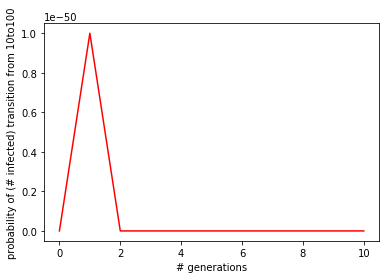

(10, 51, 51)


In [103]:
binomial_analysis(100, 10, 100, 10)

In [ ]:
# break

In [ ]:
def markov_prob(i, N):
    f = np.float64(i/N)
    fnext = [(f**2, np.float64((i-2)/(N-2)), (2*f*(1-f), np.float64((i-1)/(N-2))), ((1-f)**2, np.float64((i)/(N-2)))]
    return fnext